# Getting Started

### Import modules

In [12]:
from rlway.pyosrd.osrd import OSRD
from rlway.schedules import Schedule, schedule_from_osrd

# Import two CpAgents :
from rlway_cpagent.ortools_agent.ortools_agent import OrtoolsAgent

### Load a use case and add delays

In [13]:
# Load an OSRD use case
ref = OSRD(use_case='station_capacity2', dir='tmp')
# Clear the tmp delays
ref.reset_delays()
# Add a new delay to the use case
ref.add_delay('train0', time_threshold=100, delay=285.)
delayed = ref.delayed()

[14:29:18,244] [INFO]  [StandaloneSimulationCommand] Loading infra: tmp/infra.json
[14:29:18,271] [INFO]              [FullInfra] parsing infra
[14:29:18,328] [INFO]              [FullInfra] adaptation to kotlin
[14:29:18,361] [INFO]              [FullInfra] loading signals
[14:29:18,366] [INFO]              [FullInfra] building blocks
[14:29:18,370] [INFO]  [StandaloneSimulationCommand] Loading input: tmp/simulation.json
[14:29:18,380] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.4
[14:29:18,429] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.5
[14:29:18,435] [INFO]  [StandaloneSimulationCommand] All simulations completed
[14:29:18,435] [INFO]  [StandaloneSimulationCommand] Saving results at: tmp/results.json


### Visualize use case

In [14]:
# Convert the simulation in a format more suitable for visualization
delayed_schedule = schedule_from_osrd(delayed)

In [15]:
# Draw the infrastructure
delayed_schedule.draw_graph()

/home/simon/dev/python/cpagent/.venv/lib/python3.10/site-packages/rlway/schedules/schedules.py:425: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  for u, v in zip(self.df.index, self.df.fillna(0).values)


<Axes: xlabel='Time'>

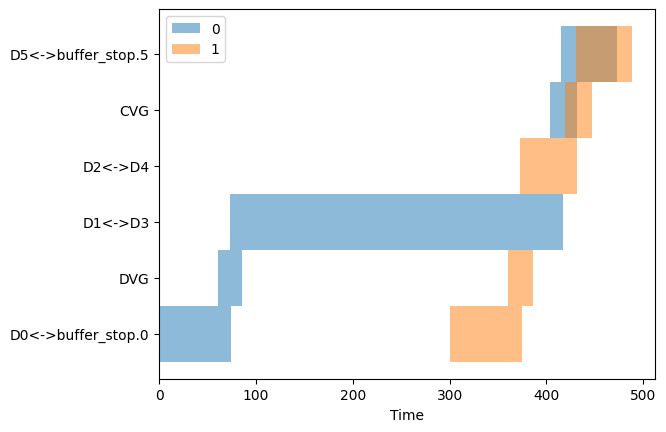

In [16]:
# Plot the space/time graph
delayed_schedule.plot()

### Compute an optimal regulation using OrtoolsAgent

In [17]:
ortools_regulated = ref.regulate(agent=OrtoolsAgent("ortools_agent"))
ortools_regulated_schedule = schedule_from_osrd(ortools_regulated)

[14:29:18,999] [INFO]  [StandaloneSimulationCommand] Loading infra: tmp/infra.json
[14:29:19,024] [INFO]              [FullInfra] parsing infra
[14:29:19,085] [INFO]              [FullInfra] adaptation to kotlin
[14:29:19,110] [INFO]              [FullInfra] loading signals
[14:29:19,114] [INFO]              [FullInfra] building blocks
[14:29:19,119] [INFO]  [StandaloneSimulationCommand] Loading input: tmp/delayed/ortools_agent/simulation.json
[14:29:19,129] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.4
[14:29:19,184] [INFO]  [StandaloneSimulationCommand] Running simulation for schedule group: group.5
[14:29:19,192] [INFO]  [StandaloneSimulationCommand] All simulations completed
[14:29:19,192] [INFO]  [StandaloneSimulationCommand] Saving results at: tmp/delayed/ortools_agent/results.json


### 